# Cruce de rectas

Tenemos las ecuaciones de dos rectas:

$
\begin{matrix}
a_{00} x_0 + a_{01} x_1 & = &b_0 \\
a_{01} x_0 + a_{11} x_1 & = &b_1
\end{matrix}
$

y en forma matricial se escriben como:

$
\left[
\begin{array}{cccc}
a_{00} & a_{01} \\
a_{01} & a_{11}
\end{array} \right] 
\left[
\begin{array}{cccc}
x_{0} \\
x_{1}
\end{array} \right] 
=
\left[
\begin{array}{c}
b_0 \\ b_1
\end{array}
\right]
$

Para encontrar el punto de cruce de las dos rectas, debemos resolver el sistema de ecuaciones.

## Ejemplo: 
$
\begin{array}{ccc}
3x_0 + 2x_1 & = &2 \\
2x_0 + 6x_1 & = &-8
\end{array} \Longrightarrow
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right]
\left[
\begin{array}{cccc}
x_{0} \\
x_{1}
\end{array} \right] 
=
\left[
\begin{array}{c}
2\\ -8
\end{array}
\right]
$

Las ecuaciones de las rectas se pueden escribir como:

$
\begin{array}{ccc}
\dfrac{3}{2}x_0 + x_1 & = & \dfrac{2}{2} \\
\dfrac{2}{6}x_0 + x_1 & = & -\dfrac{8}{6}
\end{array} \Longrightarrow
\begin{array}{ccc}
y_0 = m_0 x + b_0 \\
y_1 = m_1 x + b_1
\end{array} \text{ donde }
\begin{array}{ccc}
m_0 = -\dfrac{3}{2} & b_0 = 1 \\
m_1 = -\dfrac{2}{6} & b_1 = -\dfrac{8}{6}
\end{array}
$


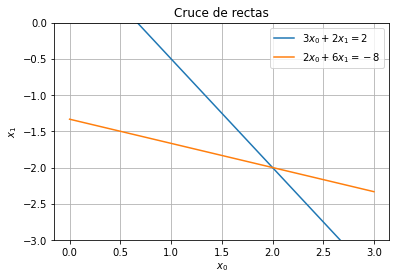

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m0 = -3/2
b0 = 1
m1 = -2/6
b1 = -8/6
x = np.linspace(0,3,10)
y0 = m0 * x + b0
y1 = m1 * x + b1 
plt.plot(x,y0,label = '$3x_0+2x_1=2$')
plt.plot(x,y1,label = '$2x_0+6x_1=-8$')
plt.ylim(-3,0)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Cruce de rectas')
plt.grid()
plt.legend()


Matriz A : 
 [[3 2]
 [2 6]]
Vector b : 
 [ 2 -8]
Solución del sistema:  [ 2. -2.]


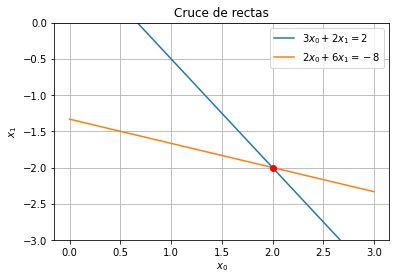

In [4]:
A = np.matrix([[3, 2],[2,6]] )
b = np.array([2,-8])
print("Matriz A : \n",A)
print("Vector b : \n", b)
sol = np.linalg.solve(A,b)
print("Solución del sistema: ", sol)

plt.plot(x,y0,label = '$3x_0+2x_1=2$')
plt.plot(x,y1,label = '$2x_0+6x_1=-8$')
plt.plot(sol[0],sol[1],'ro')
plt.ylim(-3,0)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Cruce de rectas')
plt.grid()
plt.legend()

# Jacobi

In [5]:
def jacobi(A,b,tol,kmax):
    N = len(b)
    xnew = np.zeros(N)
    xold = np.zeros(N)
    error = 10
    k = 0
    while(error > tol and k < kmax) :
        for i in range(0,N): # se puede hacer en paralelo
            xnew[i] = 0
            for j in range(0,i):
                xnew[i] += A[i,j] * xold[j]
            for j in range(i+1,N):
                xnew[i] += A[i,j] * xold[j]                
            xnew[i] = (b[i] - xnew[i]) / A[i,i]
        error = np.linalg.norm(xnew-xold)
        k += 1
        xold[:] = xnew[:]
        print(k, error)
    return xnew, error, k

In [6]:
sol, e, it = jacobi(A,b,1e-7,100)
print(sol, e, it)

1 1.4907119849998598
2 0.9162456945817022
3 0.33126932999996883
4 0.20361015435148977
5 0.0736154066666598
6 0.04524670096699795
7 0.016358979259257733
8 0.010054822437110403
9 0.003635328724279497
10 0.002234404986024193
11 0.0008078508276176108
12 0.0004965344413387215
13 0.00017952240613725788
14 0.00011034098696408254
15 3.989386803054588e-05
16 2.4520219325435447e-05
17 8.865304006732806e-06
18 5.448937627455682e-06
19 1.970067556985534e-06
20 1.2108750279824113e-06
21 4.377927903529618e-07
22 2.6908333923450834e-07
23 9.728728666786823e-08
[ 1.99999991 -1.99999996] 9.728728666786823e-08 23


# Gauss-Seidel

In [7]:
def gauss_seidel(A,b,tol,kmax):
    N = len(b)
    xnew = np.zeros(N)
    xold = np.zeros(N)
    error = 10
    k = 0
    while(error > tol and k < kmax) :
        for i in range(0,N): # se puede hacer en paralelo
            xnew[i] = 0
            for j in range(0,i):
                xnew[i] += A[i,j] * xnew[j]
            for j in range(i+1,N):
                xnew[i] += A[i,j] * xold[j]                
            xnew[i] = (b[i] - xnew[i]) / A[i,i]
        error = np.linalg.norm(xnew-xold)
        k += 1
        xold[:] = xnew[:]
        print(k, error)
    return xnew, error, k

In [9]:
sol, e, it = gauss_seidel(A,b,1e-7,100)
print(sol, e, it)

1 1.692394023525313
2 1.0931330183298098
3 0.24291844851773545
4 0.05398187744838608
5 0.011995972766308316
6 0.002665771725846191
7 0.0005923937168546622
8 0.00013164304818982352
9 2.925401070900571e-05
10 6.500891268761557e-06
11 1.444642504122424e-06
12 3.210316670210275e-07
13 7.134037081580428e-08
[ 1.99999998 -1.99999999] 7.134037081580428e-08 13


# SOR

In [10]:
def sor(A,b,tol,kmax,w):
    N = len(b)
    xnew = np.zeros(N)
    xold = np.zeros(N)
    error = 10
    k = 0
    while(error > tol and k < kmax) :
        for i in range(0,N): # se puede hacer en paralelo
            sigma = 0
            for j in range(0,i):
                sigma += A[i,j] * xnew[j]
            for j in range(i+1,N):
                sigma += A[i,j] * xold[j]                
            sigma = (b[i] - sigma) / A[i,i]
            xnew[i] = xold[i] + w * (sigma -xold[i])
        error = np.linalg.norm(xnew-xold)
        k += 1
        xold[:] = xnew[:]
        print(k, error)
    return xnew, error, k

In [11]:
sol, e, it = sor(A,b,1e-7,100,1.0)
print(sol, e, it)

1 1.692394023525313
2 1.0931330183298098
3 0.24291844851773567
4 0.05398187744838608
5 0.011995972766308316
6 0.002665771725846191
7 0.0005923937168546622
8 0.00013164304818982352
9 2.925401070900571e-05
10 6.500891268761557e-06
11 1.444642504122424e-06
12 3.210316670210275e-07
13 7.134037081580428e-08
[ 1.99999998 -1.99999999] 7.134037081580428e-08 13


In [ ]:
def Laplaciano2D(Nx, Ny, diagonal):
    """ Esta funcion calcula los coeficientes del 
    sistema lineal producido por el operador de 
    Laplace en 2D. Estos coeficientes son almacenados 
    en la matriz pentadiagonal correspondiente."""
    N = Nx * Ny
    A = np.zeros((N,N))

# Primero llena los bloques tridiagonales
    for j in range(0,Ny):
        ofs = Nx * j
        A[ofs, ofs] = diagonal; 
        A[ofs, ofs + 1] = 1
        for i in range(1,Nx-1):
            A[ofs + i, ofs + i]     = diagonal
            A[ofs + i, ofs + i + 1] = 1
            A[ofs + i, ofs + i - 1] = 1
            A[ofs + Nx - 1, ofs + Nx - 2] = 1; 
            A[ofs + Nx - 1, ofs + Nx - 1] = diagonal 

# Despues llena las dos diagonales externas
    for k in range(0,N-Nx):
        A[k, Nx + k] = 1
        A[Nx + k, k] = 1

    return A

def GraficaSuperficieC(xg,yg,u):
    plt.contourf(xg, yg, u, 8, alpha=.75, cmap=plt.cm.hot)
    C = plt.contour(xg, yg, u, 8, colors='black')
    plt.clabel(C, inline=1, fontsize=10)

    plt.show()

In [ ]:
import time

Nx = 11
Ny = 11
boundA = 100
boundB = -25
boundC = 34
boundD = 7

f = np.zeros((Ny,Nx)) # RHS
A = Laplaciano2D(Nx, Ny,-4) # Matriz del sistema

# Aplicacion de las condiciones de frontera Dirichlet
f[0   ,:] -= boundA # Bottom wall    
f[Ny-1,:] -= boundB # Upper wall
f[:,0   ] -= boundC # Left wall 
f[:,Nx-1] -= boundD # Right wall

# La solucion sera guardada en el arreglo u, que es de tamanio Ny+2 x Nx+2, pues incluye las fronteras
u = np.zeros((Ny+2, Nx+2))

# Se utiliza un algoritmo del paquete linalg para obtener la solucion del sistema de N x N
ut = np.copy(u[1:Ny+1,1:Nx+1])
ut.shape = ut.size   # Cambiamos los arreglos a formato unidimensional
f.shape = f.size     # Cambiamos los arreglos a formato unidimensional

error = 0
it = 0
t1 = time.clock()
#ut = np.linalg.solve(A,f)
#ut,error,it = jacobi(A,f,1e-6,100)
#ut,error,it = gauss_seidel(A,f,1e-6,100)
ut,error,it = sor(A,f,1.0e-5,100,1.5)
t2 = time.clock()
te = t2 - t1
print(" Elapsed time to solve Ax = b : %g" % te)
print(" error : %g, iteraciones : %d" % (error, it))

u[Ny+1,:   ] = boundB 
u[:   ,0   ] = boundC 
u[:   ,Nx+1] = boundD
u[0   ,:   ] = boundA

ut.shape = (Ny, Nx) # Regresamos el arreglo a formato bidimensional
u[1:Ny+1,1:Nx+1] = ut

x = np.linspace(0,1,Nx+2)
y = np.linspace(0,1,Ny+2)
xg, yg = np.meshgrid(x,y)

GraficaSuperficieC(xg,yg,u)
